In [139]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
conn = sqlite3.connect('result.db')

In [4]:
df_bank = pd.read_sql_query('select * from AgtBank', conn)
df_simulation = pd.read_sql_query('select * from Simulation', conn)

In [151]:
conn.close()

In [ ]:
df_bank.loc[:,'ResRatio'] = df_bank[df_bank.BankDeposit > 0].apply(lambda x: x['BankReserve'] / x['BankDeposit'], axis=1)

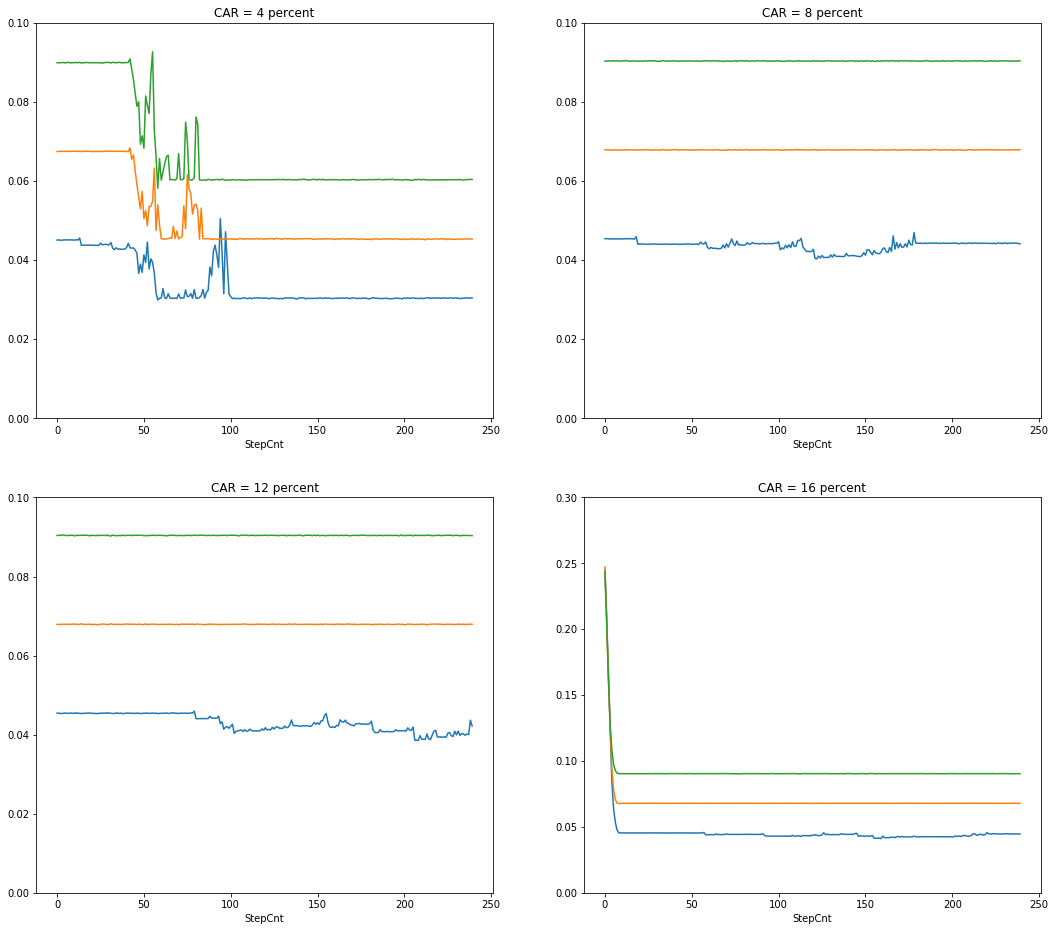

In [150]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(18,16))
dic_axes = {0:axes[0,0], 1:axes[0,1], 2:axes[1,0], 3:axes[1,1]}
dic_ylim = {0:(0.0,0.10), 1:(0.0,0.10), 2:(0.0,0.10), 3:(0.0,0.30)}

axes[0,0].set_title('CAR = 4 percent')
axes[0,1].set_title('CAR = 8 percent')
axes[1,0].set_title('CAR = 12 percent')
axes[1,1].set_title('CAR = 16 percent')

lst_car = [['CAR 0.040000, Reserves Ratio 0.030000','CAR 0.040000, Reserves Ratio 0.045000','CAR 0.040000, Reserves Ratio 0.060000'],
['CAR 0.080000, Reserves Ratio 0.030000','CAR 0.080000, Reserves Ratio 0.045000','CAR 0.080000, Reserves Ratio 0.060000'],
['CAR 0.120000, Reserves Ratio 0.030000','CAR 0.120000, Reserves Ratio 0.045000','CAR 0.120000, Reserves Ratio 0.060000'],
['CAR 0.160000, Reserves Ratio 0.030000','CAR 0.160000, Reserves Ratio 0.045000','CAR 0.160000, Reserves Ratio 0.060000']]

for i,car in enumerate(lst_car):
    for mrr in car:
        col1 = df_simulation.SimId[df_simulation.Title.str.contains(mrr)]
        df_f1 = df_bank[df_bank.SimId.isin(col1)]
        t2 = df_f1[['StepCnt','BankReserve','BankDeposit','ResRatio']].groupby(['StepCnt']).mean()
        t2['ResRatio'].plot(ax=dic_axes[i], ylim=dic_ylim[i])

